<center><font size = "10"> Week 5 - Cable Theory <center>
<center><font size = "8">Home work<center>

<font size = "3">Please, write your group number and the names and surnames of the group members here
<br>Group number: 8
<br>Group member1: Chiara Maria Matti
<br>Group member2: Elena Grazia Gado
<br>Group member3: ELiser Josan Romero
    
__IMPORTANT:__<font size = "3"> Exercises in <font color='red'>red</font> are mandatory assignements to be delivered by next Monday before 23:59.

In [ ]:
%matplotlib inline

from neuron import h
import matplotlib.pyplot as plt
import numpy as np
import math as m
import neurom as nm
import seaborn as sns
from neurom import view
from hoc2swc import neuron2swc

sns.set_style("darkgrid")

# <font color= 'red'>Ex 1:</font> Attenuation. 

<font size="3">Create a simple morphology with only one section called soma, as it is done in tutorial 01 of this week 4, point 1. Perform a current clamp experiment in which the stimulation has the following parameters: delay 1 ms, amplitude 1 pA and duration 10 ms. Then do the following:
    

    - inject current at the centre of the section soma and show voltage vs spatial location, for different number of segments per section (6, 8, 10, 11 and 21) (in the same plot).
    - do the same as before, but injecting current at the end of the soma.
    - explain with your own words what differences do you see between injecting the current in the center or at the end of the section, and what differences do you observe if we have more or less segments per section.
    - inject current at the center of the section soma and manipulate (increase, decrease) the axial resistance Ra, show the results in one plot and explain what do you see
    - do the same as before, but this time manipulate the section diameter. Plot the results and explain what you see
<font color='red'> [1.5 pts]

# <font color= 'red'>Ex 2:</font> Action Potential Back Propagation. 

<font size='3'> Create a neuron with a soma, an axon with two sections, and a dendrite consisting of a main trunk opening into three branches (as in tutorial 2). Each of the branches should have a different diameter (5, 1 and 0.1 µm) but the same length (300 µm). Add passive properties to every section and add active properties (hh) to the soma, axon and to the dendritic trunk, but not to the branches. You can use the parameters (for the active properties) from tutorial 03. 

<font size='3'> Perform a current clamp experiment in which the soma is stimulated at the center and the dendritic branches and axon are recorded at their ends. Choose the best stimulation parameters to see the signal attenuation in the branches. Visualize the results.
    
<font size='3'>Explain with your own words:    
   - What are passive and active membrane properties?  
   - What is going on with the voltage signal propagation from the soma to each of the branches? What happens in the axon?
   - What happens if the active properties of the dendrite are removed? 
    
<font size="3"> __Hint:__ Use similar i and V plots to those in tutorial 3, part 3 to help you with the explanation.
    
<font color= 'red'> [2 pts] </font>

# <font color= 'red'>Ex 3:</font> Dendritic input signal summation in the soma
<font size="3"> Load one of the "good" morphology files for your group that were given in week 3. For this exercise choose one pyramidal cell, instantiate it and visualise it, as it is done in tutorial 03.
    
<font size="3"> Perform a current clamp experiment that stimulates all the dendrites (basal and apical) at their midpoints and record at the middle of the soma. Play around with the different stimulation parameters: delay, amplitude and duration.

<font size="3"> __Hint:__ Modify one parameter at a time, by increasing or decreasing its value several times, and see what it is happening to the voltage.

<font size="3"> Read the articles that you can find in the homework folder. Plot results of different stimulation protocols that could help you explain: 
    
    - What is dendritic signal integration? And, in your opinion, what is its importance for the brain? 
    - What happens if you stimulate only apical dendrites? What would you see at the soma?
    
    
<font size="3"> __Hint:__ Use similar i and V plots to those in tutorial 3, part 4.
    
<font color= 'red'> [2.5 pts] </font>


> morph_4.swc from week 3 is used in this case

In [1]:
%matplotlib inline

from neuron import h
import matplotlib.pyplot as plt
import numpy as np
import math as m
import neurom as nm
import seaborn as sns
from neurom import view
from hoc2swc import neuron2swc

--No graphics will be displayed.


In [2]:
sns.set_style("whitegrid")
# Global containers for objects
simulations_records = []  # stimulations
voltage_records = []  # voltage recordings
current_records = []  # current recordings


def reset():
    """Convenience functions for setting up stimulation, recording and simulation"""
    del simulations_records[:]
    del voltage_records[:]
    del current_records[:]


def iclamp(location, delay=100, amplitude=0.1, duration=500):
    """"Inject a current step with parameters at location"""
    stim = h.IClamp(location)  # Place a stimulation electrode at location
    stim.delay = delay  # stim delay (ms)
    stim.amp = amplitude  # stim amplitude (pA)
    stim.dur = duration  # stim ducurrent_recordsration (ms)
    simulations_records.append({"stim": stim, "loc": str(location)})


def record_voltage(location):
    """Setup recording of voltage at location"""
    vec = h.Vector()
    vec.record(location._ref_v)  # record voltage at location
    voltage_records.append({"vec": vec, "loc": str(location)})


def record_current(stimulation_dict):
    """Setup recording of stimulation current"""
    vec = h.Vector()
    vec.record(stimulation_dict["stim"]._ref_i)  # record stimulation current
    current_records.append({"vec": vec, "loc": stimulation_dict["loc"]})


def init_run(v_i, t_stop):
    """Initialize and run a simulation"""
    # Record time
    rec_t = h.Vector()
    rec_t.record(h._ref_t)
    # Record current for all stimuli
    for stimulation_dict in simulations_records:
        record_current(stimulation_dict)
    # Setup simulation and run
    h.load_file("stdrun.hoc")
    h.finitialize(v_i)  # initial voltage
    h.continuerun(t_stop)  # final time
    return rec_t


def tvi_plots(
    t, voltage_records=[], current_records=[], vmax=40, imax=0.5, legendv=True):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 3))
    """Plot current and voltage for all stims and recordings"""
    ax1.set_title("currents")
    ax1.set_ylim((-0.01, imax))
    ax1.set_xlabel("t (ms)")
    ax1.set_ylabel("I (pA)")
    for idict in current_records:
        ax1.plot(t, idict["vec"], label=idict["loc"])
    if legendv:
        plt.legend(loc=1)

    
    ax2.set_title("voltages")
    ax2.set_ylim((-71, vmax))
    ax2.set_ylabel("V (mV)")
    ax2.set_xlabel("t (ms)")
    for vdict in voltage_records:
        ax2.plot(t, vdict["vec"], label=vdict["loc"])
    plt.legend(loc=1)


def plot_morphology(fname="cell_01"):
    fname = "{}.swc".format(fname)
    h.define_shape()
    h.topology()
    neuron2swc(fname, swap_yz=False)
    neuron1 = nm.load_morphology(fname)
    view.plot_morph(neuron1)

In [3]:
class NEURON:
    def __init__(self):
        self.build_morphology()
        self.define_biophysics()

    def build_morphology(self):
        """
        Loads a 3D morphology of the neuron
        """
        # Load hoc routines to import 3D morphologies
        h.load_file("stdlib.hoc")
        h.load_file("import3d.hoc")
        cell = h.Import3d_SWC_read() # We have a .swc morphology file
        #cell = h.Import3d_Neurolucida3()

        # Read the file and creates automatically section.connect(parent) statements
        cell.input("morph_4.swc")

        # Instantiate morphology for simulation and
        # execute the connect statements and loads the cell into h scope
        self.importedcell = h.Import3d_GUI(cell, 0)
        self.importedcell.instantiate(None)

        # Create python lists from the morphology with the different sections: soma, dend, apic and axon
        self.somatic = []
        self.dendritic = []
        self.apical = []
        self.axonal = []
        self.all = []
        for sec in h.allsec():
            if "soma" in sec.name():
                self.somatic.append(sec)
            if "dend" in sec.name():
                self.dendritic.append(sec)
            if "apic" in sec.name():
                self.apical.append(sec)
            if "axon" in sec.name():
                self.axonal.append(sec)

    def define_biophysics(self):
        """
        Distributes passive mechanisms and hh active prop on the soma and dendrites
        """
        # Define passive properties for all sections
        for sec in h.allsec():
            sec.insert("pas")
            sec.nseg = 1
            for seg in sec:
                seg.pas.g = 0.0003  # Conductance of the leak channels (in S/cm2)
                seg.pas.e = -70

        # Define active properties for soma, dendrite, apical dendrite and axon
        for sec in self.somatic:
            # insert hh
            sec.insert("hh")
            sec.Ra = 1
            sec.nseg = 1
            for seg in sec:
                seg.hh.gkbar = 0.1  # Maximal conductance of the potassium channels
                seg.hh.gnabar = 0.4  # Maximal conductance of the sodium channels

        for sec in self.dendritic:
            # insert hh
            sec.insert("hh")
            sec.Ra = 300
            sec.nseg = 1
            for seg in sec:
                seg.hh.gkbar = 0.1  # Maximal conductance of the potassium channels
                seg.hh.gnabar = 0.4  # Maximal conductance of the sodium channels

        for sec in self.apical:
            # insert hh
            sec.insert("hh")
            sec.Ra = 400
            sec.nseg = 1
            for seg in sec:
                seg.hh.gkbar = 0.1  # Maximal conductance of the potassium channels
                seg.hh.gnabar = 0.4  # Maximal conductance of the sodium channels

        for sec in self.axonal:
            # insert hh
            sec.insert("hh")
            sec.Ra = 100
            sec.nseg = 1
            for seg in sec:
                seg.hh.gkbar = 0.1  # Maximal conductance of the potassium channels
                seg.hh.gnabar = 0.4  # Maximal conductance of the sodium channels

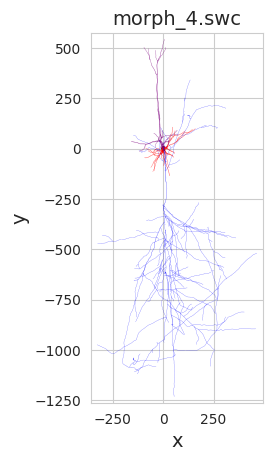

In [4]:
plot_morphology("morph_4")

In [5]:
Cell = NEURON()

## Dendritic signal integration in the soma

In [6]:
def plot_dendrites_signal(which = "both", d = 0.5, amp = 4.5, delay = 100, f_idx = 100, dura = 50, v_ini = -70, t_s = 1000, v_max = 60, i_max = 6):
    reset()

    if which == "both":
        dendrite_list = Cell.dendritic + Cell.apical
    elif which == "dendritic":
        dendrite_list = Cell.dendritic
    elif which == "apical":
        dendrite_list = Cell.apical

    # Setup stimulations and recordings
    for idx, dendrites in enumerate(dendrite_list):
        iclamp(dendrites(d), amplitude=amp, delay=delay + idx * f_idx, duration=dura)
    record_voltage(Cell.somatic[0](0.5))

    # Simulate and plot
    v_init = v_ini
    t_stop = t_s
    tvi_plots(
        init_run(v_init, t_stop),
        voltage_records,
        current_records,
        vmax=v_max,
        imax=i_max,
        legendv=False,
    )

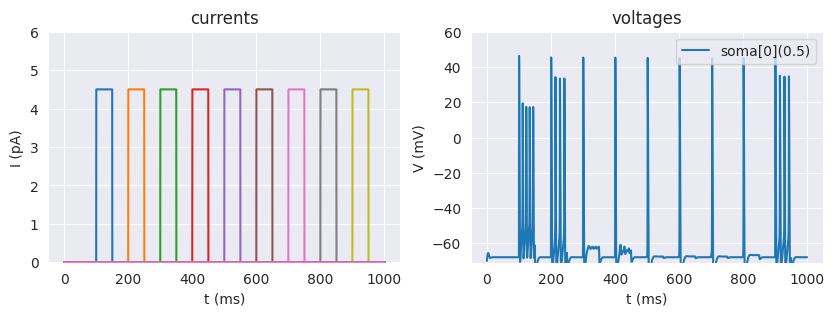

In [7]:
plot_dendrites_signal()

### - What is dendritic signal integration? And, in your opinion, what is its importance for the brain? 
> A neuron is connected to several other which form a neuronal network. Therefore, one neuron is receives several inputs from others. These inputs are mostly in the dendrites. This is why all those simultaneous signal must be integrated togheter in order to output the correct response and generate an Action potential (AP). This is the dendritic signal integration, it is affected by the membrane properties and the morphology of the dendritic tree. This is all done by temporal and spatial summation. The temporal summation is the sum of the signals that arrive at the same time but in different locations. The spatial summation is the sum of the signals that arrive at different times but in the same location.

>This is important for the brain du to the fact that neuronal network of the brain is highly complex and interconnected with neurons from other parts of the brain. Therefore, each neurons must be able to process all the information that it receives and then output the correct response. This is why dendritic signal integration is important for the brain.

### Varying delay parameters

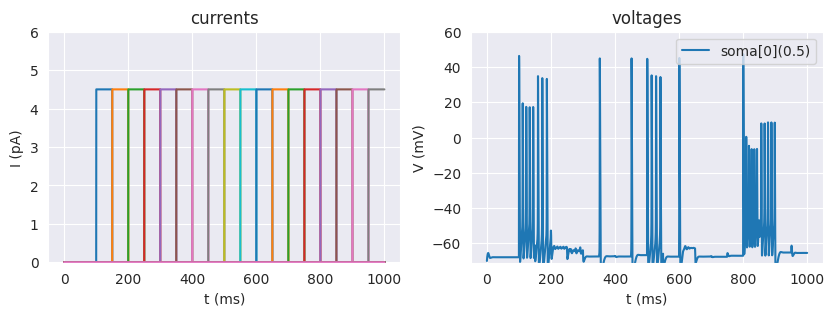

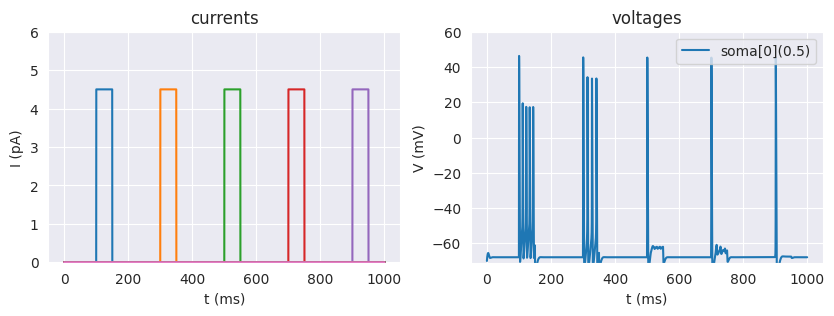

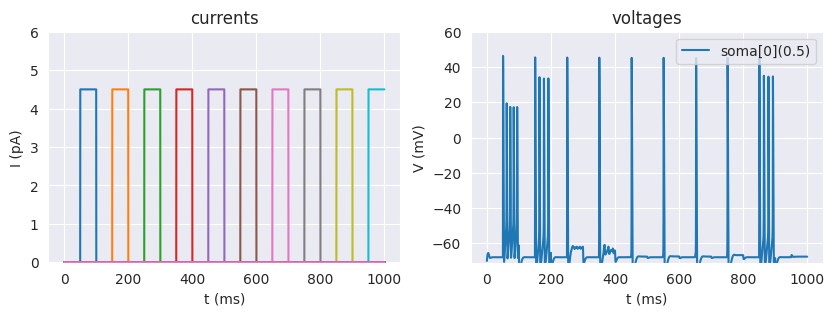

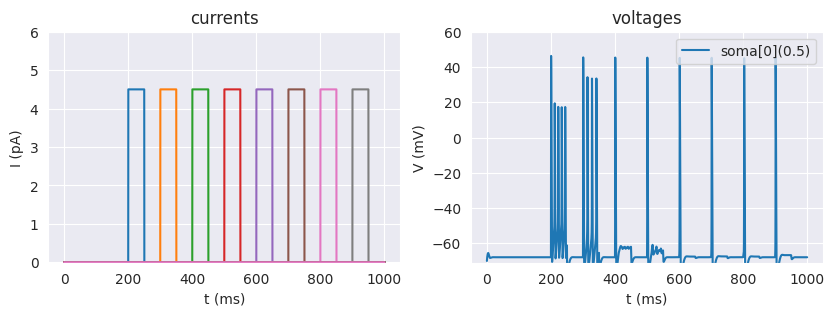

In [8]:
plot_dendrites_signal(f_idx = 50)
plot_dendrites_signal(f_idx = 200)
plot_dendrites_signal(delay = 50)
plot_dendrites_signal(delay = 200)

> We see here that modifying the delay parameter f_idx will increase or decrease frequency of APs. This can be explained by the temporal summation. EPSPs are sumed up to the larger values which triggeres more frequently APs.

### Varying amplitude parameter

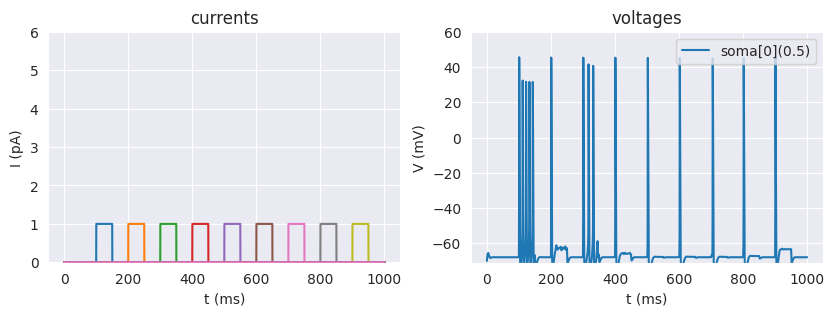

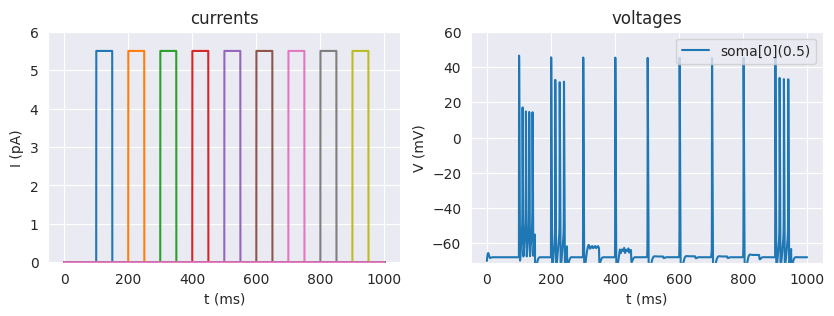

In [9]:
plot_dendrites_signal(amp = 1)
plot_dendrites_signal(amp = 5.5)

> We observe that the AP frequency is proportional to the amplitude of the current. This can be explained by the fact that the larger the amplitude is, the larger the EPSPs are. Therefore, the APs are triggered more frequently.

### Varying duration parameter

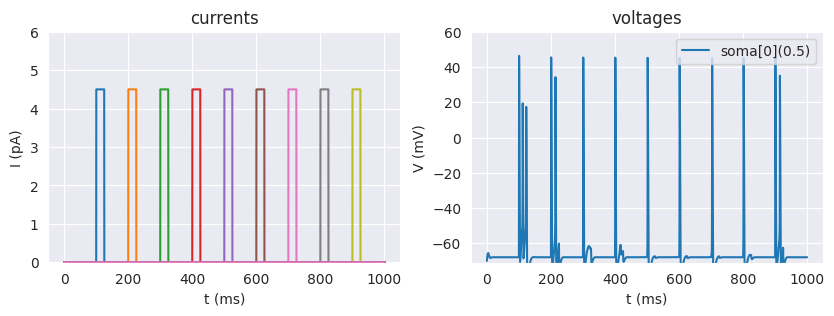

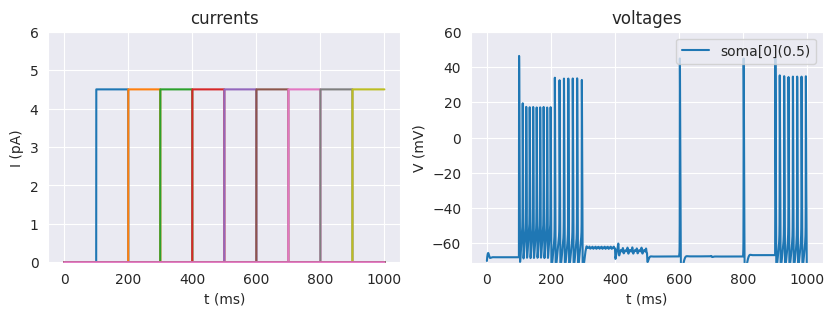

In [10]:
plot_dendrites_signal(dura = 25)
plot_dendrites_signal(dura = 100)

> Looking at the duration parameter, we see that the AP frequency is proportional to the duration of the current. 

## - What happens if you stimulate only apical dendrites? What would you see at the soma?

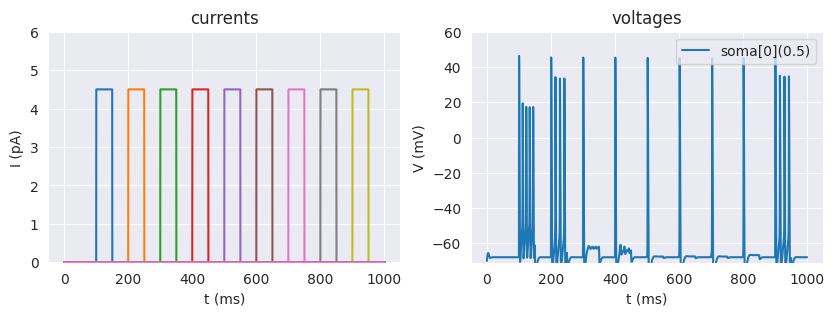

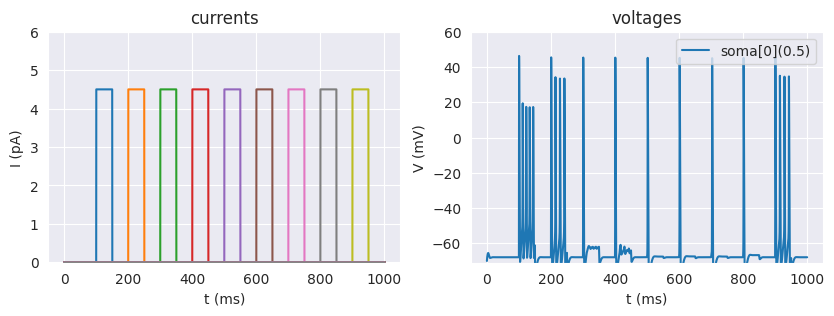

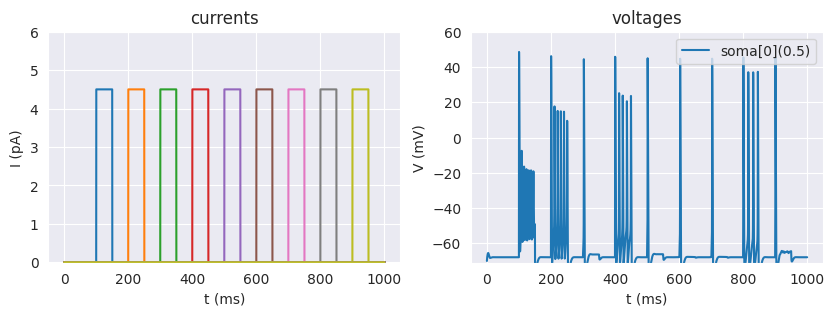

In [11]:
plot_dendrites_signal()
plot_dendrites_signal(which = "dendritic")
plot_dendrites_signal(which = "apical")

> When we stimulate only the apical dendrites, we see that APs are still induce at the soma. This suggest that apical dendrites have an also an influence on the overall response. However, it seems to have a lower contribution than the basal dendrites. This could be due to the difference in distance from the soma, which is larger for apical. Hence, the apical having a higher axial resistance, which diminish their inputs provided to the soma.